# Advanced Regression Assignment

#### Importing the libraries

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [7]:
round(df.isnull().mean()*100, 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [8]:
high_null_cols = []
for i in df.columns:
    if df[i].isnull().mean() > 0.50:
        high_null_cols.append(i)
print(high_null_cols)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']


#### Dropping columns with high missing values

In [9]:
df.drop(high_null_cols, axis = 1, inplace = True)
df.drop('Id', axis = 1, inplace = True)
df.shape

(1460, 76)

#### Left ot with 76 out of 81 columns

#### Let's check the missing valued numerical columns

In [10]:
null_obj_cols = []
null_num_cols = []
for i in df.columns:
    if df[i].isnull().mean() > 0:
        if df[i].dtype == 'int64' or df[i].dtype == 'float64':
            null_num_cols.append(i)
        else:
            null_obj_cols.append(i)

In [11]:
null_num_cols

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

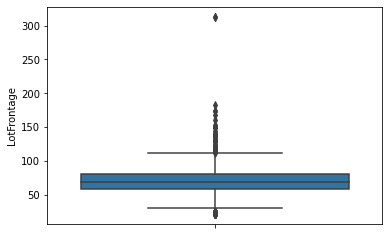

In [12]:
sns.boxplot(y = df['LotFrontage'])
plt.show()

#### LotFrontage has outliers, hence replacing missing values with median

In [13]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['LotFrontage'].isnull().sum()

0

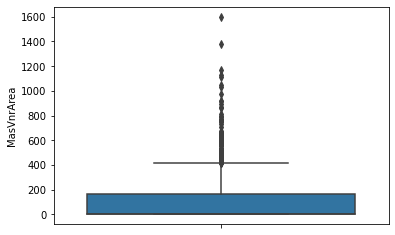

In [14]:
sns.boxplot(y = df['MasVnrArea'])
plt.show()

#### MasVnrArea contains outliers. hence replacing missing values with median

In [15]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['MasVnrArea'].isnull().sum()

0

#### Converting Year columns into years numerical value as Age

In [16]:
curr_year = 2020
df['Age'] = 2020 - df['GarageYrBlt']
print(df['Age'].isnull().sum())
df.drop('GarageYrBlt', axis = 1, inplace = True)
print(df.shape)

81
(1460, 76)


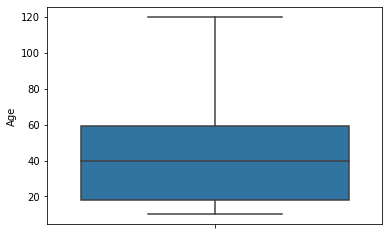

In [17]:
sns.boxplot(y = df['Age'])
plt.show()

In [18]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Age'].isnull().sum()

0

#### Analysis on Categorical Features with missing values

In [19]:
null_obj_cols

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [20]:
df['FireplaceQu'].isnull().mean()*100

47.26027397260274

In [21]:
df['FireplaceQu'].value_counts()/len(df)*100

Gd    26.027397
TA    21.438356
Fa     2.260274
Ex     1.643836
Po     1.369863
Name: FireplaceQu, dtype: float64

#### Replacing NA in FirePlace with "No FirePlace" since the missing value is a meaningful missing attribute

In [22]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace')
df['FireplaceQu'].isnull().sum()

0

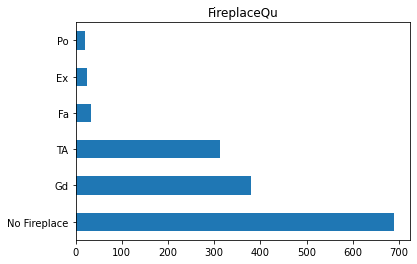

In [23]:
df['FireplaceQu'].value_counts().plot.barh()
plt.title('FireplaceQu')
plt.show()

#### MasVnrType

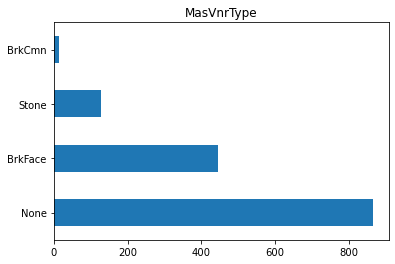

In [24]:
df['MasVnrType'].value_counts().plot.barh()
plt.title('MasVnrType')
plt.show()

#### MasVnrType is perfectly fine with no class imbalance or skewness, hence replacing the missing values with mode

In [25]:
df['MasVnrType'].isnull().sum()

8

In [26]:
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrType'].isnull().sum()

0

#### BsmtQual

In [27]:
df['BsmtQual'].isnull().sum()

37

In [28]:
df['BsmtQual'].value_counts()/len(df)*100

TA    44.452055
Gd    42.328767
Ex     8.287671
Fa     2.397260
Name: BsmtQual, dtype: float64

#### BsmtQual missing values can be marked as No Basement, replacing as follows

In [29]:
df['BsmtQual'] = df['BsmtQual'].fillna('No Basement')
df['BsmtQual'].isnull().sum()

0

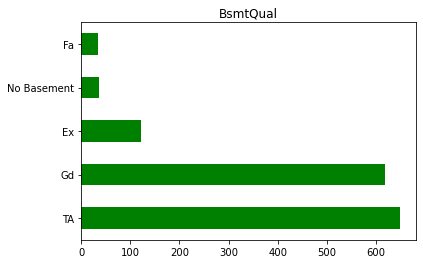

In [30]:
df['BsmtQual'].value_counts().plot.barh(color='g')
plt.title('BsmtQual')
plt.show()

#### BsmtCond

In [31]:
df['BsmtCond'].value_counts()/len(df)*100

TA    89.794521
Gd     4.452055
Fa     3.082192
Po     0.136986
Name: BsmtCond, dtype: float64

#### A highly skewed column with 89% values as TA ( Typical ) class, hence dropping the column from df

In [32]:
df.drop('BsmtCond', axis=1, inplace=True)
df.shape

(1460, 75)

#### BsmtExposure

In [33]:
df['BsmtExposure'].value_counts()/len(df)*100

No    65.273973
Av    15.136986
Gd     9.178082
Mn     7.808219
Name: BsmtExposure, dtype: float64

#### NA in BsmtExposure refers No Basement, hence replacing missing values with No Basement

In [34]:
df['BsmtExposure'] = df['BsmtExposure'].fillna('No Basement')
df['BsmtExposure'].isnull().sum()

0

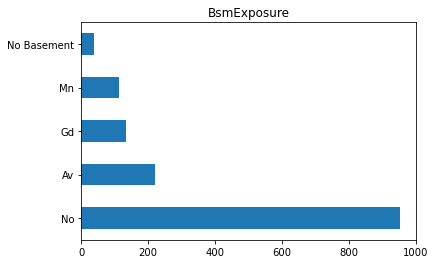

In [35]:
df['BsmtExposure'].value_counts().plot.barh()
plt.title('BsmExposure')
plt.show()

#### BsmtFinType1

In [36]:
df['BsmtFinType1'].value_counts()/len(df)*100

Unf    29.452055
GLQ    28.630137
ALQ    15.068493
BLQ    10.136986
Rec     9.109589
LwQ     5.068493
Name: BsmtFinType1, dtype: float64

#### NA in BsmtFinType1 refers No Basement, hence replacing missing values with No Basement

In [37]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No Basement')
df['BsmtFinType1'].isnull().sum()

0

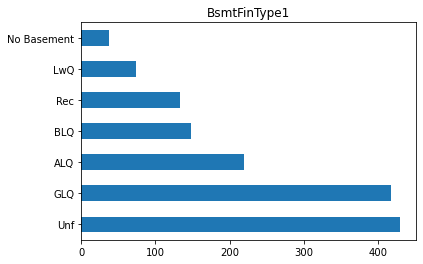

In [38]:
df['BsmtFinType1'].value_counts().plot.barh()
plt.title('BsmtFinType1')
plt.show()

#### BsmtFinType2

In [39]:
df['BsmtFinType2'].value_counts()/len(df)*100

Unf    86.027397
Rec     3.698630
LwQ     3.150685
BLQ     2.260274
ALQ     1.301370
GLQ     0.958904
Name: BsmtFinType2, dtype: float64

#### NA in BsmtFinType2 refers No Basement, hence replacing missing values with No Basement

In [40]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No Basement')
df['BsmtFinType2'].isnull().sum()

0

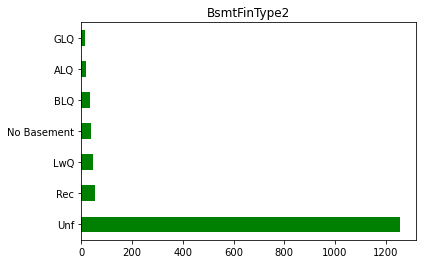

In [41]:
df['BsmtFinType2'].value_counts().plot.barh(color='g')
plt.title('BsmtFinType2')
plt.show()

#### A highly skewed column, hence dropping BsmtFinType1 doesn't effect our analysis

In [42]:
df.drop('BsmtFinType2', axis=1, inplace=True)
df.shape

(1460, 74)

#### Electrical

In [43]:
df['Electrical'].value_counts()/len(df)*100

SBrkr    91.369863
FuseA     6.438356
FuseF     1.849315
FuseP     0.205479
Mix       0.068493
Name: Electrical, dtype: float64

#### Electrical is a highly skewed column with more than 90% occupied by a single class, hence dropping it

In [44]:
df.drop('Electrical', axis=1, inplace=True)
df.shape

(1460, 73)

#### GarageType

In [45]:
df['GarageType'].value_counts()/len(df)*100

Attchd     59.589041
Detchd     26.506849
BuiltIn     6.027397
Basment     1.301370
CarPort     0.616438
2Types      0.410959
Name: GarageType, dtype: float64

#### NA in GarageType means that there is no garage, hence replacing missing values with 'No Garage'

In [46]:
df['GarageType'] = df['GarageType'].fillna('No Garage')
df['GarageType'].isnull().sum()

0

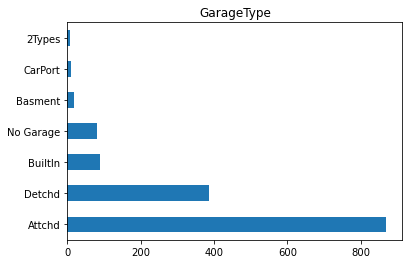

In [47]:
df['GarageType'].value_counts().plot.barh()
plt.title('GarageType')
plt.show()

#### GarageFinish

In [48]:
df['GarageFinish'].value_counts()/len(df)*100

Unf    41.438356
RFn    28.904110
Fin    24.109589
Name: GarageFinish, dtype: float64

#### NA in GarageFinish means that there is no garage, hence replacing the missing values with 'No Garage'

In [49]:
df['GarageFinish'] = df['GarageFinish'].fillna('No Garage')
df['GarageFinish'].isnull().sum()

0

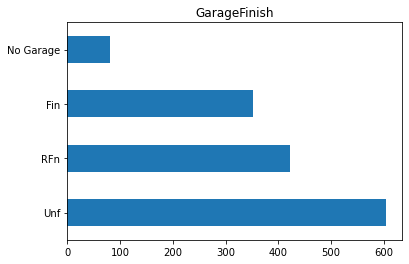

In [50]:
df['GarageFinish'].value_counts().plot.barh()
plt.title('GarageFinish')
plt.show()

#### GarageQual

In [51]:
df['GarageQual'].value_counts()/len(df)*100

TA    89.794521
Fa     3.287671
Gd     0.958904
Po     0.205479
Ex     0.205479
Name: GarageQual, dtype: float64

#### GarageQual is highly skewed with TA occupied near to 90% values, hence dropping the column

In [52]:
df.drop('GarageQual', axis=1, inplace=True)
df.shape

(1460, 72)

#### GarageCond

In [53]:
df['GarageCond'].value_counts()/len(df)*100

TA    90.821918
Fa     2.397260
Gd     0.616438
Po     0.479452
Ex     0.136986
Name: GarageCond, dtype: float64

#### GarageCond is highly skewed more than 90% values filled with attribute TA, hence dropping the feature

In [54]:
df.drop('GarageCond', axis=1, inplace=True)
df.shape

(1460, 71)

#### The data is clean with zero missing values

In [55]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu 

### Exploratory Data Analysis

#### SalePrice is the target column

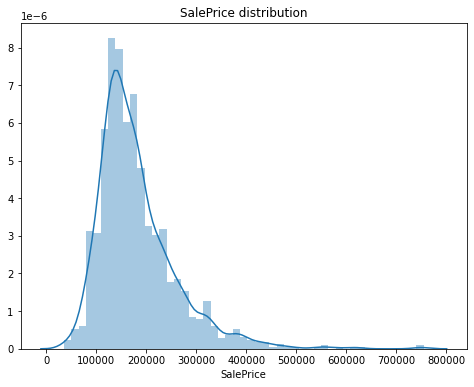

In [56]:
plt.figure(figsize=(8,6))
sns.distplot(df['SalePrice'])
plt.title('SalePrice distribution')
plt.show()

#### Inference: Target variable follows a right skwed distribution slightly i.e not follwing the required Gaussian distribution

#### Transforming the Target into Normal distribution by log1p transformation

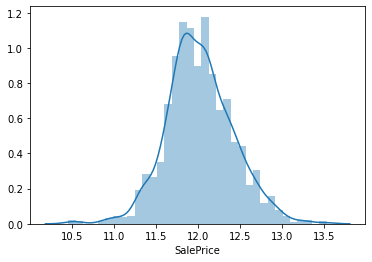

In [57]:
df['SalePrice'] = np.log1p(df['SalePrice'])
sns.distplot(df['SalePrice'])

##### Target is now following the Gaussian Dsitribution

#### MSSubClass

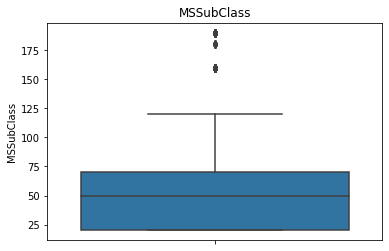

In [58]:
sns.boxplot(y = df['MSSubClass'])
plt.title('MSSubClass')
plt.show()

In [59]:
df['MSSubClass'].describe()

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

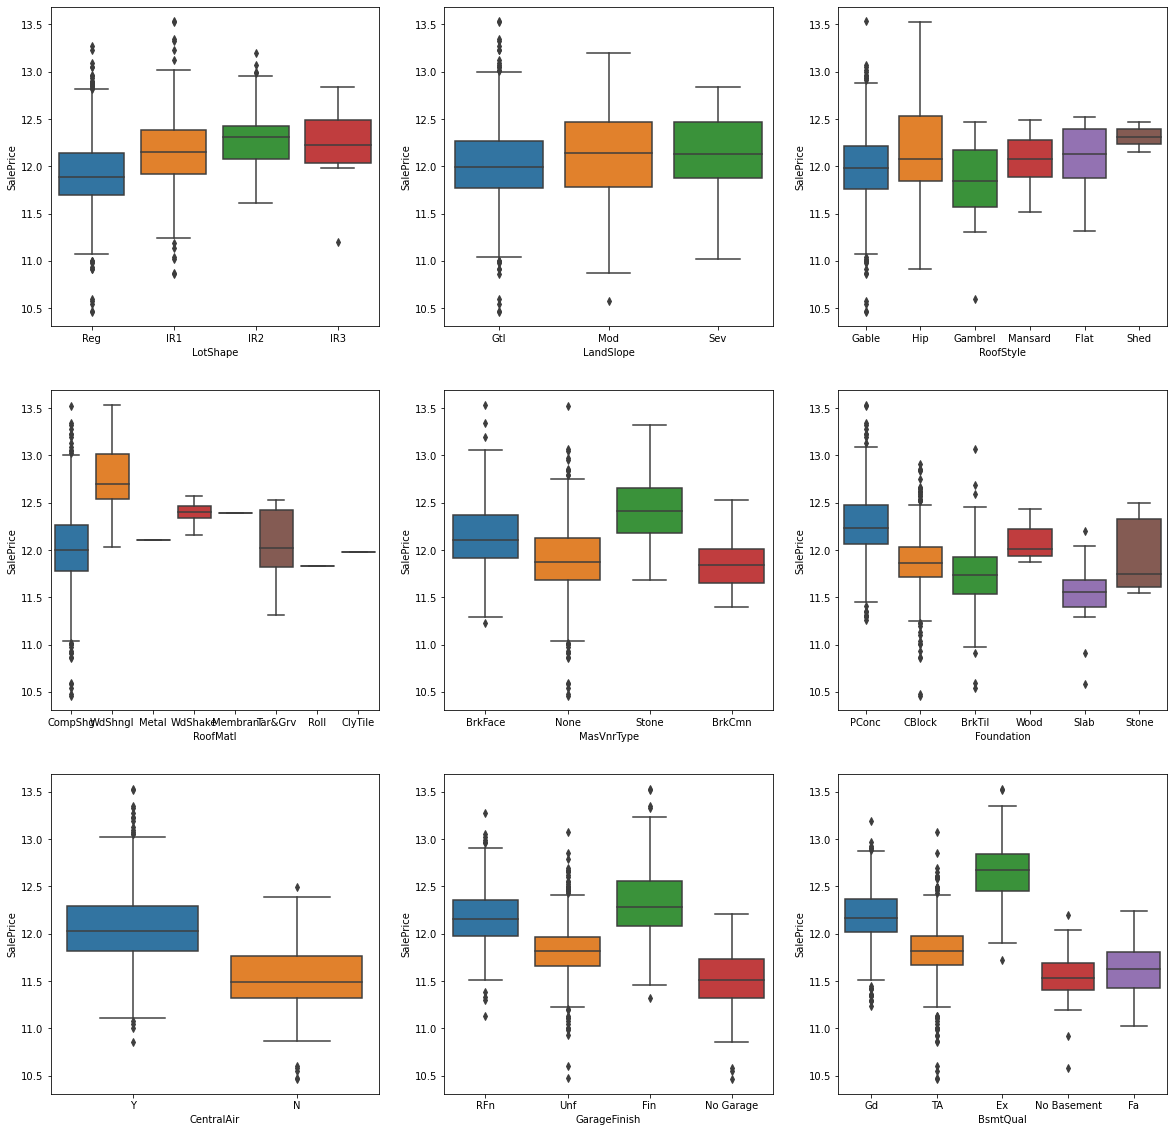

In [60]:
# ['LotShape','LandSlope','RoofStyle','RoofMatl','MasVnrType','Foundation',
# 'CentralAir','Fence','GarageQual']

plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'LandSlope', y= 'SalePrice', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'RoofMatl', y = 'SalePrice', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'MasVnrType', y= 'SalePrice', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'Foundation', y= 'SalePrice', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = df)
plt.subplot(3,3,9)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = df)
plt.show()

#### LotFrontage

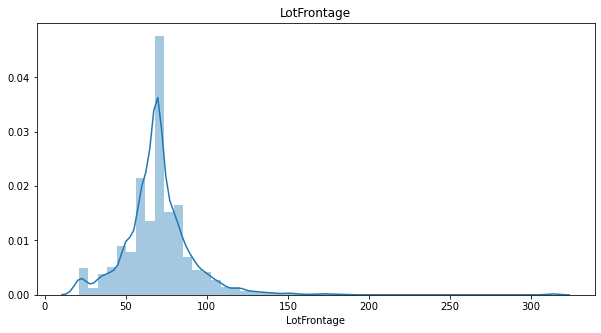

In [61]:
plt.figure(figsize=(10,5))
sns.distplot(df['LotFrontage'])
plt.title('LotFrontage')
plt.show()

#### LotArea

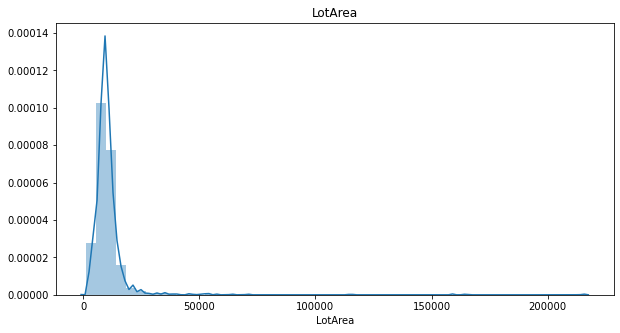

In [62]:
plt.figure(figsize=(10,5))
sns.distplot(df['LotArea'])
plt.title('LotArea')
plt.show()

#### LotArea is a right skewed distributed variable

#### Street

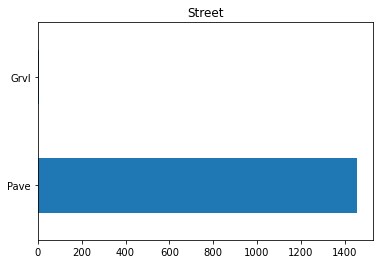

In [63]:
df['Street'].value_counts().plot.barh()
plt.title('Street')
plt.show()

#### Inference: A highly skewed variable, dropping this doesn't effect the performance

In [64]:
df.drop('Street', axis=1, inplace=True)
df.shape

(1460, 70)

#### LandContour

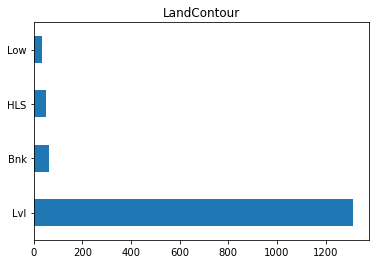

In [65]:
df['LandContour'].value_counts().plot.barh()
plt.title('LandContour')
plt.show()

#### Inference: LandContour is a highly skewed variabe, dropping this won't effect our performance

In [66]:
df.drop('LandContour', axis=1, inplace=True)
df.shape

(1460, 69)

#### Utilities

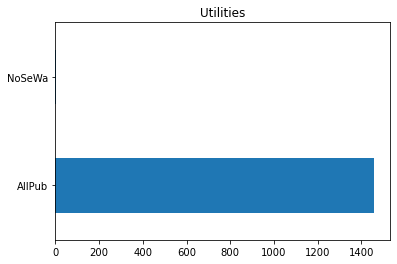

In [67]:
df['Utilities'].value_counts().plot.barh()
plt.title("Utilities")
plt.show()

#### Inference: Utilities is a highly skewed variabe, dropping this won't effect our performance

In [68]:
df.drop('Utilities', axis=1, inplace=True)
df.shape

(1460, 68)

#### LotConfig

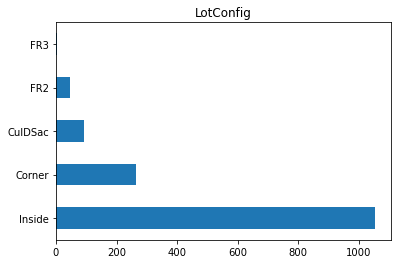

In [69]:
df['LotConfig'].value_counts().plot.barh()
plt.title("LotConfig")
plt.show()

#### Inference: A little class imblance, but dropping isn't necessary for LotConfig

#### LandSlope

Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64


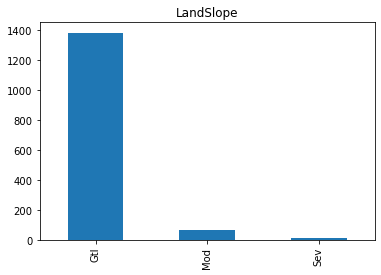

In [70]:
print(df['LandSlope'].value_counts()/len(df)*100)
df['LandSlope'].value_counts().plot.bar()
plt.title('LandSlope')
plt.show()

#### LandSlope is a highly skewed column with attribute Gtl near to 95%, hence dropping the variable

In [71]:
df.drop('LandSlope', axis=1, inplace=True)
df.shape

(1460, 67)

#### Condition1

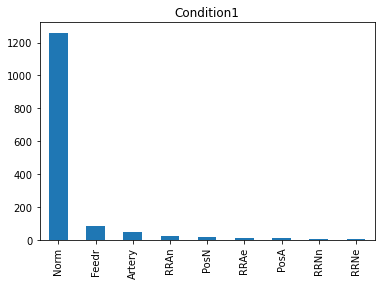

In [72]:
df['Condition1'].value_counts().plot.bar()
plt.title('Condition1')
plt.show()

#### Inference: A highly skewed column, hence dropping this variable won't effect the performance

In [73]:
df.drop('Condition1', axis=1, inplace=True)
df.shape

(1460, 66)

#### Condition2

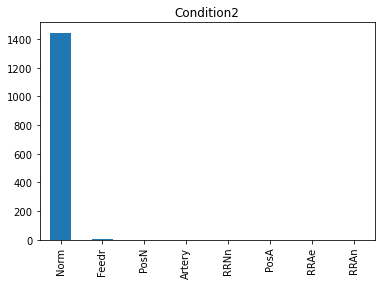

In [74]:
df['Condition2'].value_counts().plot.bar()
plt.title("Condition2")
plt.show()

#### Inference: A highy skewed column, hence dropping won't effect our analysis

In [75]:
df.drop('Condition2', axis=1, inplace=True)
df.shape

(1460, 65)

#### BldgType

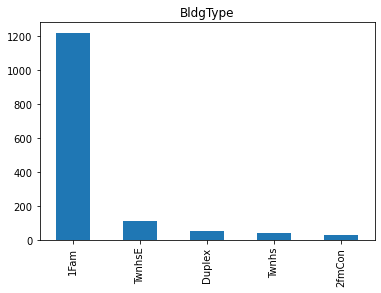

In [76]:
df['BldgType'].value_counts().plot.bar()
plt.title('BldgType')
plt.show()

#### Inference: A highly Skewed column, dropping this won't effect our analysis

In [77]:
df.drop('BldgType', axis=1, inplace=True)
df.shape

(1460, 64)

#### HouseStyle

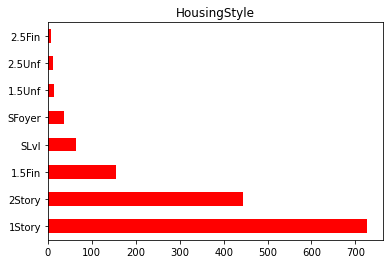

In [78]:
df['HouseStyle'].value_counts().plot.barh(color='r')
plt.title('HousingStyle')
plt.show()

#### RoofStyle

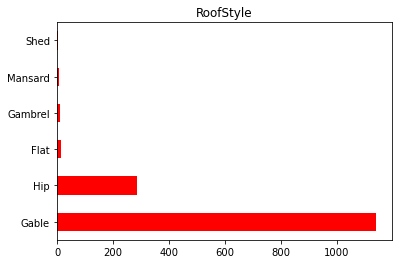

In [79]:
df['RoofStyle'].value_counts().plot.barh(color='r')
plt.title('RoofStyle')
plt.show()

#### RoofMatl

In [80]:
df['RoofMatl'].value_counts()/len(df)*100

CompShg    98.219178
Tar&Grv     0.753425
WdShngl     0.410959
WdShake     0.342466
Metal       0.068493
Membran     0.068493
ClyTile     0.068493
Roll        0.068493
Name: RoofMatl, dtype: float64

#### Inference: Highly Skewed variable, dropping RoofMatl

In [81]:
df.drop('RoofMatl', axis=1, inplace=True)
df.shape

(1460, 63)

#### MasVnrType

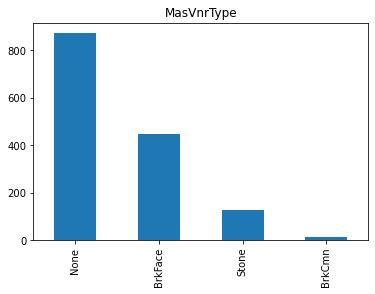

In [82]:
df['MasVnrType'].value_counts().plot.bar()
plt.title("MasVnrType")
plt.show()

#### ExternQual

In [83]:
df['ExterQual'].value_counts()/len(df)*100

TA    62.054795
Gd    33.424658
Ex     3.561644
Fa     0.958904
Name: ExterQual, dtype: float64

#### ExterCond

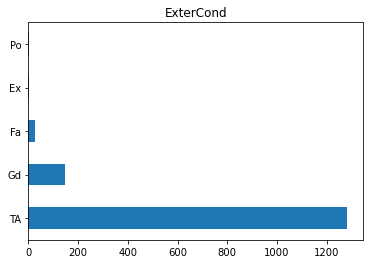

In [84]:
df['ExterCond'].value_counts().plot.barh()
plt.title("ExterCond")
plt.show()

#### Inference: Highly skewed column, hence dropping ExterCond

In [85]:
df.drop('ExterCond', axis=1, inplace=True)
df.shape

(1460, 62)

#### Foundation

In [86]:
df['Foundation'].value_counts()/len(df)*100

PConc     44.315068
CBlock    43.424658
BrkTil    10.000000
Slab       1.643836
Stone      0.410959
Wood       0.205479
Name: Foundation, dtype: float64

#### BsmtQual

In [87]:
df['BsmtQual'].value_counts()/len(df)*100

TA             44.452055
Gd             42.328767
Ex              8.287671
No Basement     2.534247
Fa              2.397260
Name: BsmtQual, dtype: float64

#### BsmtExposure

In [88]:
df['BsmtExposure'].value_counts()/len(df)*100

No             65.273973
Av             15.136986
Gd              9.178082
Mn              7.808219
No Basement     2.602740
Name: BsmtExposure, dtype: float64

#### BsmtFinType1

In [89]:
df['BsmtFinType1'].value_counts()/len(df)*100

Unf            29.452055
GLQ            28.630137
ALQ            15.068493
BLQ            10.136986
Rec             9.109589
LwQ             5.068493
No Basement     2.534247
Name: BsmtFinType1, dtype: float64

#### Heating

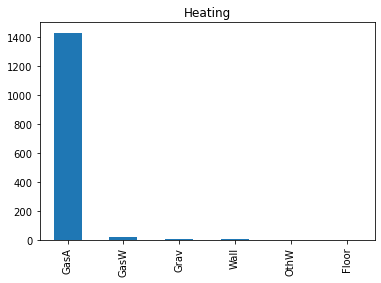

In [90]:
df['Heating'].value_counts().plot.bar()
plt.title('Heating')
plt.show()

#### Inference: A highly skewed variable, hence dropping "Heating"

In [91]:
df.drop('Heating', axis=1, inplace=True)
df.shape

(1460, 61)

#### HeatingQC

In [92]:
df['HeatingQC'].value_counts()/len(df)*100

Ex    50.753425
TA    29.315068
Gd    16.506849
Fa     3.356164
Po     0.068493
Name: HeatingQC, dtype: float64

#### CentralAir

In [93]:
df['CentralAir'].value_counts()/len(df)*100

Y    93.493151
N     6.506849
Name: CentralAir, dtype: float64

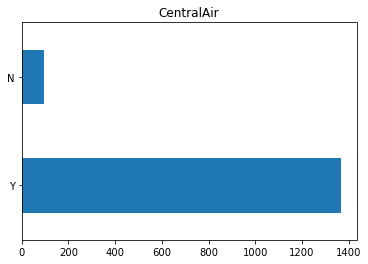

In [94]:
df['CentralAir'].value_counts().plot.barh()
plt.title('CentralAir')
plt.show()

#### Inference: Highly skewed column, hence dropping "CentralAir"

In [95]:
df.drop('CentralAir', axis=1, inplace=True)
df.shape

(1460, 60)

#### Functional

In [96]:
df['Functional'].value_counts()/len(df)*100

Typ     93.150685
Min2     2.328767
Min1     2.123288
Mod      1.027397
Maj1     0.958904
Maj2     0.342466
Sev      0.068493
Name: Functional, dtype: float64

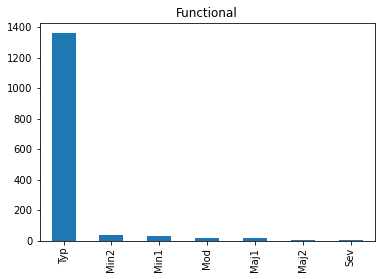

In [97]:
df['Functional'].value_counts().plot.bar()
plt.title('Functional')
plt.show()

#### Inference: A highly skewed column, hence dropping "Functional"

#### PavedDrive

In [98]:
df['PavedDrive'].value_counts()/len(df)*100

Y    91.780822
N     6.164384
P     2.054795
Name: PavedDrive, dtype: float64

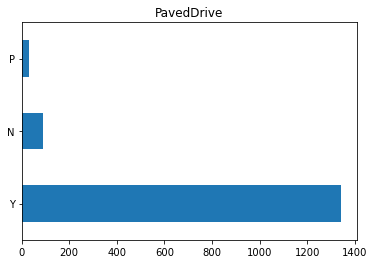

In [99]:
df['PavedDrive'].value_counts().plot.barh()
plt.title('PavedDrive')
plt.show()

#### Inference: a highly variable, hence dropping "PavedDrive"

In [100]:
df.drop('PavedDrive', axis=1, inplace=True)
df.shape

(1460, 59)

#### SaleType

In [101]:
df['SaleType'].value_counts()/len(df)*100

WD       86.780822
New       8.356164
COD       2.945205
ConLD     0.616438
ConLI     0.342466
ConLw     0.342466
CWD       0.273973
Oth       0.205479
Con       0.136986
Name: SaleType, dtype: float64

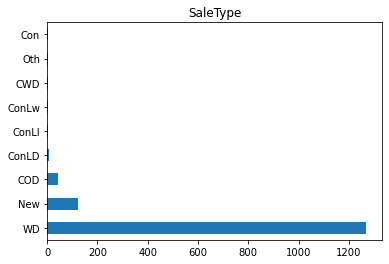

In [102]:
df['SaleType'].value_counts().plot.barh()
plt.title('SaleType')
plt.show()

#### Inference: A highly skewed column, hence dropping "SaleType"

#### SaleCondition

In [103]:
df['SaleCondition'].value_counts()/len(df)*100

Normal     82.054795
Partial     8.561644
Abnorml     6.917808
Family      1.369863
Alloca      0.821918
AdjLand     0.273973
Name: SaleCondition, dtype: float64

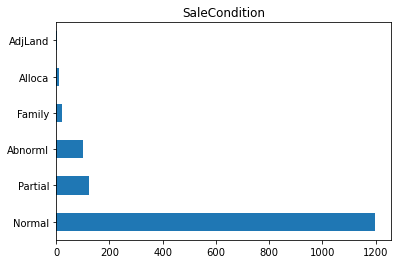

In [104]:
df['SaleCondition'].value_counts().plot.barh()
plt.title('SaleCondition')
plt.show()

#### Inference: A highly skewed variable, hence dropping "SaleCondition"

In [105]:
df.drop('SaleCondition', axis=1, inplace=True)
df.shape

(1460, 58)

#### MSZoning

In [106]:
df['MSZoning'].value_counts()/len(df)*100

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64

In [107]:
# Changing the MSZoning classes into meaningful classes
df['MSZoning'] = df['MSZoning'].replace('RL','Residential Low Density')
df['MSZoning'] = df['MSZoning'].replace('RM','Residential Medium Density')
df['MSZoning'] = df['MSZoning'].replace('RH','Residential High Density')

In [108]:
num_cols = []
for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        num_cols.append(i)

In [109]:
print(num_cols)
print("**********")
print(len(num_cols))

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'Age']
**********
37


In [110]:
num_cols.remove('SalePrice')
print(len(num_cols))

36


In [111]:
obj_cols = []
for i in df.columns:
    if df[i].dtype == 'object':
        obj_cols.append(i)

### Dummy creation

In [112]:
df.shape

(1460, 58)

In [113]:
for i in obj_cols:
    d = pd.get_dummies(df[i], drop_first=True)
    df = pd.concat([df, d], axis = 1)

In [114]:
print(obj_cols)

['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'SaleType']


In [115]:
df.shape

(1460, 194)

In [116]:
df.drop(obj_cols, axis=1, inplace=True)
df.shape

(1460, 173)

In [117]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age,FV,Residential High Density,Residential Low Density,Residential Medium Density,IR2,IR3,Reg,CulDSac,FR2,FR3,Inside,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Gable,Gambrel,Hip,Mansard,Shed,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkFace,None,Stone,Fa,Gd,TA,CBlock,PConc,Slab,Stone,Wood,Fa,Gd,No Basement,TA,Gd,Mn,No,No Basement,BLQ,GLQ,LwQ,No Basement,Rec,Unf,Fa,Gd,Po,TA,Fa,Gd,TA,Maj2,Min1,Min2,Mod,Sev,Typ,Fa,Gd,No Fireplace,Po,TA,Attchd,Basment,BuiltIn,CarPort,Detchd,No Garage,No Garage,RFn,Unf,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,12.247699,17.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,12.109016,44.0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,12.317171,19.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,11.849405,22.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,12.429220,20.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [118]:
X = df.drop('SalePrice', axis = 1)
y = df['SalePrice']

In [119]:
y.values.reshape(-1,1)

array([[12.24769912],
       [12.10901644],
       [12.31717117],
       ...,
       [12.49313327],
       [11.86446927],
       [11.90159023]])

### Train Test Split

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state = 100)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1021, 172)
(1021,)
(439, 172)
(439,)


In [122]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Age,FV,Residential High Density,Residential Low Density,Residential Medium Density,IR2,IR3,Reg,CulDSac,FR2,FR3,Inside,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Gable,Gambrel,Hip,Mansard,Shed,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkFace,None,Stone,Fa,Gd,TA,CBlock,PConc,Slab,Stone,Wood,Fa,Gd,No Basement,TA,Gd,Mn,No,No Basement,BLQ,GLQ,LwQ,No Basement,Rec,Unf,Fa,Gd,Po,TA,Fa,Gd,TA,Maj2,Min1,Min2,Mod,Sev,Typ,Fa,Gd,No Fireplace,Po,TA,Attchd,Basment,BuiltIn,CarPort,Detchd,No Garage,No Garage,RFn,Unf,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD
318,60,90.0,9900,7,5,1993,1993,256.0,987,0,360,1347,1372,1274,0,2646,1,0,2,1,4,1,9,1,3,656,340,60,144,0,0,0,0,4,2009,27.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
239,50,52.0,8741,6,4,1945,1950,0.0,94,0,641,735,798,689,0,1487,0,0,1,1,3,1,7,1,1,220,0,140,0,0,0,0,0,4,2010,71.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
986,50,59.0,5310,6,8,1910,2003,0.0,0,0,485,485,1001,634,0,1635,0,0,1,0,2,1,5,0,1,255,394,0,0,0,0,0,0,6,2006,70.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1416,190,60.0,11340,4,6,1885,1950,0.0,0,0,777,777,1246,1044,0,2290,0,0,2,0,4,2,11,0,2,560,0,0,114,0,0,0,0,4,2010,49.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
390,50,50.0,8405,5,8,1900,1950,0.0,241,391,229,861,961,406,0,1367,1,0,1,0,4,1,7,0,1,384,0,130,112,0,0,0,0,4,2008,42.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [123]:
y_train.head()

318     12.468441
239     11.635152
986     11.669938
1416    11.715874
390     11.686887
Name: SalePrice, dtype: float64

### Scaling the input variables

In [124]:
print(num_cols)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Age']


In [125]:
from sklearn.preprocessing import MinMaxScaler

In [126]:
scaler = MinMaxScaler()

# fitting & transforming on train data
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
# Transforming the test data
X_test[num_cols] = scaler.transform(X_test[num_cols])

#### Preview of the scaled train and test data in two followed 2 cells

In [127]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Age,FV,Residential High Density,Residential Low Density,Residential Medium Density,IR2,IR3,Reg,CulDSac,FR2,FR3,Inside,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Gable,Gambrel,Hip,Mansard,Shed,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkFace,None,Stone,Fa,Gd,TA,CBlock,PConc,Slab,Stone,Wood,Fa,Gd,No Basement,TA,Gd,Mn,No,No Basement,BLQ,GLQ,LwQ,No Basement,Rec,Unf,Fa,Gd,Po,TA,Fa,Gd,TA,Maj2,Min1,Min2,Mod,Sev,Typ,Fa,Gd,No Fireplace,Po,TA,Attchd,Basment,BuiltIn,CarPort,Detchd,No Garage,No Garage,RFn,Unf,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD
318,0.235294,0.236301,0.039403,0.666667,0.500,0.876812,0.716667,0.16,0.174876,0.000000,0.154110,0.220458,0.231481,0.616949,0.0,0.424289,0.333333,0.0,0.666667,0.5,0.500,0.0,0.545455,0.333333,0.75,0.462623,0.396733,0.114723,0.260870,0.0,0.0,0.0,0.0,0.272727,0.75,0.154545,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
239,0.176471,0.106164,0.033981,0.555556,0.375,0.528986,0.000000,0.00,0.016655,0.000000,0.274401,0.120295,0.098611,0.333656,0.0,0.201576,0.000000,0.0,0.333333,0.5,0.375,0.0,0.363636,0.333333,0.25,0.155148,0.000000,0.267686,0.000000,0.0,0.0,0.0,0.0,0.272727,1.00,0.554545,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
986,0.176471,0.130137,0.017931,0.555556,0.875,0.275362,0.883333,0.00,0.000000,0.000000,0.207620,0.079378,0.145602,0.307022,0.0,0.230015,0.000000,0.0,0.333333,0.0,0.250,0.0,0.181818,0.000000,0.25,0.179831,0.459743,0.000000,0.000000,0.0,0.0,0.0,0.0,0.454545,0.00,0.545455,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1416,1.000000,0.133562,0.046139,0.333333,0.625,0.094203,0.000000,0.00,0.000000,0.000000,0.332620,0.127169,0.202315,0.505569,0.0,0.355880,0.000000,0.0,0.666667,0.0,0.500,0.5,0.727273,0.000000,0.50,0.394922,0.000000,0.000000,0.206522,0.0,0.0,0.0,0.0,0.272727,1.00,0.354545,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
390,0.176471,0.099315,0.032409,0.444444,0.875,0.202899,0.000000,0.00,0.042700,0.265265,0.098031,0.140917,0.136343,0.196610,0.0,0.178517,0.333333,0.0,0.333333,0.0,0.500,0.0,0.363636,0.000000,0.25,0.270804,0.000000,0.248566,0.202899,0.0,0.0,0.0,0.0,0.272727,0.50,0.290909,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [128]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Age,FV,Residential High Density,Residential Low Density,Residential Medium Density,IR2,IR3,Reg,CulDSac,FR2,FR3,Inside,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Gable,Gambrel,Hip,Mansard,Shed,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkFace,None,Stone,Fa,Gd,TA,CBlock,PConc,Slab,Stone,Wood,Fa,Gd,No Basement,TA,Gd,Mn,No,No Basement,BLQ,GLQ,LwQ,No Basement,Rec,Unf,Fa,Gd,Po,TA,Fa,Gd,TA,Maj2,Min1,Min2,Mod,Sev,Typ,Fa,Gd,No Fireplace,Po,TA,Attchd,Basment,BuiltIn,CarPort,Detchd,No Garage,No Garage,RFn,Unf,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD
1436,0.000000,0.133562,0.035192,0.333333,0.625,0.717391,0.350000,0.00000,0.109142,0.0,0.106164,0.141408,0.113889,0.000000,0.0,0.081860,0.000000,0.0,0.333333,0.0,0.375,0.0,0.181818,0.000000,0.50,0.372355,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.363636,0.25,0.327273,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
57,0.235294,0.232877,0.047566,0.666667,0.500,0.956522,0.900000,0.00000,0.000000,0.0,0.368151,0.140753,0.112963,0.416465,0.0,0.246349,0.000000,0.0,0.666667,0.5,0.375,0.0,0.363636,0.000000,0.50,0.398449,0.000000,0.133843,0.0,0.0,0.0,0.000000,0.0,0.636364,0.00,0.054545,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
780,0.000000,0.143836,0.029930,0.666667,0.500,0.891304,0.766667,0.02375,0.000000,0.0,0.529538,0.202455,0.203935,0.000000,0.0,0.156610,0.000000,0.0,0.666667,0.0,0.375,0.0,0.272727,0.333333,0.50,0.283498,0.256709,0.040153,0.0,0.0,0.0,0.000000,0.0,0.454545,0.25,0.136364,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
382,0.235294,0.198630,0.036338,0.666667,0.500,0.971014,0.933333,0.00000,0.000000,0.0,0.401969,0.153682,0.131250,0.415496,0.0,0.261145,0.000000,0.0,0.666667,0.5,0.375,0.0,0.454545,0.000000,0.50,0.450635,0.168028,0.101338,0.0,0.0,0.0,0.000000,0.0,0.272727,0.25,0.036364,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1170,0.352941,0.188356,0.039309,0.555556,0.625,0.760870,0.450000,0.00000,0.092488,0.0,0.245719,0.179378,0.172685,0.000000,0.0,0.130669,0.333333,0.0,0.333333,0.0,0.375,0.0,0.272727,0.333333,0.25,0.252468,0.236873,0.000000,0.0,0.0,0.0,0.888889,0.0,0.545455,0.50,0.300000,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Building a Linear Regression model

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [130]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# Selecting 50 best features using rfe
rfe = RFE(lm, 50)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=50)

In [131]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 2),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 8),
 ('MasVnrArea', False, 59),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 35),
 ('FullBath', True, 1),
 ('HalfBath', False, 41),
 ('BedroomAbvGr', False, 9),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 57),
 ('GarageCars', True, 1),
 ('GarageArea', False, 28),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 80),
 ('EnclosedPorch', True, 1),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('MiscVal', False, 68),
 ('MoSold', False, 121),
 ('YrSold', False, 96),
 ('Age', False, 119),
 ('FV', True, 1),
 ('Residential High Density', Tru

In [132]:
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)
print("**************************************************************")
print("Length of rfe_support_columns:",len(rfe_cols))

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'WoodDeckSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'FV',
       'Residential High Density', 'Residential Low Density',
       'Residential Medium Density', 'IR3', 'BrDale', 'ClearCr', 'Crawfor',
       'NoRidge', 'NridgHt', 'Somerst', 'StoneBr', '2.5Unf', 'AsphShn',
       'BrkComm', 'BrkFace', 'CBlock', 'AsphShn', 'CBlock', 'Other',
       'No Basement', 'No Basement', 'Po', 'Maj2', 'Sev', 'Con', 'ConLD'],
      dtype='object')
**************************************************************
Length of rfe_support_columns: 50


In [133]:
X_train = X_train[rfe_cols]
X_test = X_test[rfe_cols]

## Lasso

In [134]:
from sklearn.model_selection import GridSearchCV

In [135]:
from sklearn.linear_model import Lasso

In [136]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

folds = 5

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.3s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [137]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.063629,0.066773,0.008179,0.004343,0.0001,{'alpha': 0.0001},-0.095722,-0.093917,-0.100986,-0.083431,-0.092133,-0.093238,0.005728,1,-0.087606,-0.080059,-0.085569,-0.091400,-0.090315,-0.086990,0.004024
1,0.010970,0.004677,0.005586,0.003253,0.001,{'alpha': 0.001},-0.097194,-0.096121,-0.104067,-0.089039,-0.100411,-0.097366,0.005002,2,-0.096160,-0.087970,-0.091606,-0.098616,-0.096160,-0.094102,0.003813
2,0.011969,0.002750,0.005985,0.003679,0.01,{'alpha': 0.01},-0.141941,-0.160264,-0.155972,-0.138203,-0.156260,-0.150528,0.008751,3,-0.150525,-0.146504,-0.145686,-0.149098,-0.149990,-0.148361,0.001923
3,0.012673,0.004875,0.005381,0.001014,0.05,{'alpha': 0.05},-0.300955,-0.300201,-0.292898,-0.282030,-0.311130,-0.297443,0.009649,4,-0.297363,-0.298266,-0.296658,-0.297000,-0.293535,-0.296565,0.001607
4,0.009975,0.001786,0.008294,0.002252,0.1,{'alpha': 0.1},-0.312644,-0.312177,-0.306814,-0.295411,-0.325985,-0.310606,0.009883,5,-0.310024,-0.309195,-0.310981,-0.313369,-0.306759,-0.310066,0.002165


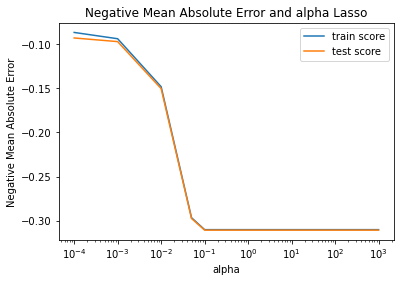

In [138]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting the mean_train & mean_test
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha Lasso")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

#### Obtaining the best alpha value from best_params_

In [139]:
alpha = model_cv.best_params_
alpha

{'alpha': 0.0001}

In [140]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [141]:
from sklearn.metrics import r2_score

y_train_pred = lasso.predict(X_train)

In [142]:
y_test_pred = lasso.predict(X_test)

### Test and Train scores Lasso regularization

In [143]:
print("Train data r2_score:",round(r2_score(y_train, y_train_pred),4)*100)
print("Test data r2_score:",round(r2_score(y_test, y_test_pred),4)*100)

Train data r2_score: 89.25
Test data r2_score: 88.0


### Selecting best features using Lasso

In [144]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

#### Top 10 features 

In [145]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,MSSubClass,10.256050
13,BsmtFullBath,1.061159
3,OverallCond,0.639875
5,BsmtFinSF1,0.434252
4,YearBuilt,0.400367
2,OverallQual,0.387266
25,Residential Low Density,0.347960
26,Residential Medium Density,0.343563
24,Residential High Density,0.294025
18,WoodDeckSF,0.284476


## Ridge

In [146]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score

In [147]:
folds  = KFold(n_splits=10,shuffle=True,random_state=100)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [148]:
cv_result = pd.DataFrame(model_cv.cv_results_)
cv_result['param_alpha'] = cv_result['param_alpha'].astype('float32')
cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.027826,0.046594,0.006285,0.001996,0.001,{'alpha': 0.001},0.897665,0.866555,0.898833,0.588694,0.924616,0.909381,0.787765,0.856299,0.918575,0.857542,0.850593,0.095380,8,0.891649,0.894567,0.891138,0.909737,0.888877,0.890614,0.902851,0.895511,0.887736,0.895324,0.894800,0.006439
1,0.007681,0.002364,0.004685,0.003153,0.010,{'alpha': 0.01},0.897644,0.866708,0.898749,0.589118,0.924661,0.909429,0.788102,0.856413,0.918681,0.857847,0.850735,0.095256,7,0.891648,0.894566,0.891137,0.909737,0.888876,0.890613,0.902850,0.895510,0.887735,0.895323,0.894800,0.006439
2,0.008875,0.003468,0.004539,0.001385,0.100,{'alpha': 0.1},0.897425,0.867878,0.897798,0.593376,0.925052,0.909803,0.791124,0.857401,0.919604,0.860528,0.851999,0.093998,6,0.891576,0.894476,0.891060,0.909681,0.888797,0.890533,0.902754,0.895428,0.887662,0.895229,0.894720,0.006441
3,0.008280,0.002641,0.005684,0.002565,0.200,{'alpha': 0.2},0.897168,0.868616,0.896616,0.598103,0.925389,0.910039,0.793900,0.858233,0.920376,0.862887,0.853133,0.092585,5,0.891395,0.894257,0.890876,0.909541,0.888600,0.890337,0.902520,0.895223,0.887478,0.894997,0.894522,0.006447
4,0.008180,0.003181,0.004487,0.001356,0.500,{'alpha': 0.5},0.896371,0.868974,0.893008,0.611757,0.926011,0.910126,0.799946,0.859631,0.921682,0.867565,0.855507,0.088461,4,0.890538,0.893277,0.890052,0.908848,0.887669,0.889419,0.901442,0.894263,0.886593,0.893937,0.893604,0.006468


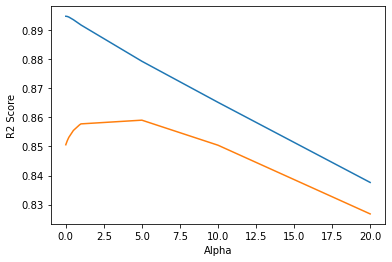

In [149]:
plt.plot(cv_result['param_alpha'],cv_result['mean_train_score'])
plt.plot(cv_result['param_alpha'],cv_result['mean_test_score'])
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [150]:
# best parameters for the ridge 
model_cv.best_params_

{'alpha': 5.0}

In [151]:
ridge = Ridge(alpha = 5.0)
ridge.fit(X_train,y_train)

Ridge(alpha=5.0)

In [152]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

### Test and Train scores Ridge regularization

In [153]:
print("Train data r2_score:",round(r2_score(y_train, y_train_pred),5)*100)
print("Test data r2_score:",round(r2_score(y_test, y_test_pred),4)*100)

Train data r2_score: 89.249
Test data r2_score: 88.0


In [154]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

#### Best Features from coefficients

In [155]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,MSSubClass,10.590377
3,OverallCond,0.556991
5,BsmtFinSF1,0.348832
13,BsmtFullBath,0.328805
4,YearBuilt,0.320004
10,2ndFlrSF,0.312966
18,WoodDeckSF,0.307428
17,GarageCars,0.218655
14,FullBath,0.212454
15,KitchenAbvGr,0.176427


## Final Results of the Lasso & Ridge regularization are as follows

## Lasso
- Optimal alpha: 0.001
- Train score: 89.25
- Test Score:  88.0
- Top 10 variables: MSSubClass,  BsmtFullBath, OverallCond, BsmtFinSF1, YearBuilt, OverallQual, Residential Low Density, Residential Medium Density, Residential High Density, WoodDeckSF

## Ridge
- Optimal alpha: 5.0
- Train score: 88.249
- Test score: 88.0
- Top 10 variables: MSSubClass, BsmtFullBath, OverallCond, BsmtFinSF1, YearBuilt, 2ndFlrSF, WoodDeckSF, GarageCars, FullBath, KitchenAbvGr